In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

%matplotlib inline

In [2]:
rpe_df = pd.read_csv("../data/rpe.csv")
games_df = pd.read_csv("../data/games.csv")
gps_df = pd.read_csv("../data/gps.csv")
well_df = pd.read_csv("../data/wellness.csv")

In [3]:
'''
    Insights: 
                1. The data for DailyLoad, AcuteLoad, ChronicLoad and AcuteChronicRatio are missing for players when the session
                    type is Combat
    
    Cleaning:
                1. Have dropped N/A values in place
                2. Changed Best out of Myself ordinal to Numerical values (1,0.5,0)
                3. Also added Psuedo running averages for 7 day load and 30 day load
    
    # groupby player id, Normalize from (0,1) over axis 0 for each variable
    # Can also use session type, and training as groupby variables
    
    Convert Best outof myself from ordinal to numerical
    fill_na with a negative value. Can also do a missing value plot to see under which values are the data missing 
    (i.e. MCAR/ MAR etc.). # R
    
    Date, Player id with well 
    
'''

def BOM_num(x):
    if(x=='Absolutely'):
        return(1)
    elif(x=='Somewhat'):
        return(0.5)
    else:
        return(0)

rpe_df2 = rpe_df

# Dropping the na values in place
rpe_df.dropna(inplace=True)

# Normalizing data to 0,1 scale grouped by diffrent variables
rpe_gb = rpe_df.drop(['Date','BestOutOfMyself'],axis=1).groupby(['PlayerID','Training','SessionType']).transform(lambda x: (x- x.min())/(x.max() - x.min()))

rpe_gb['Date'] = rpe_df['Date']
rpe_gb['PlayerID'] = rpe_df['PlayerID']
rpe_gb['Training'] = rpe_df['Training']
rpe_gb['SessionType'] = rpe_df['SessionType']

# Converting BestOutofMyself ordinal to numerical
rpe_gb['BestOutOfMyself'] = rpe_df['BestOutOfMyself'].apply(lambda x: BOM_num(x))

# Resetting the index, changed due to dropping the NA values
rpe_gb = rpe_gb.reset_index()
rpe_gb.drop('index',axis=1,inplace=True)
rpe_gb.head()

,Duration,RPE,SessionLoad,DailyLoad,AcuteLoad,ChronicLoad,AcuteChronicRatio,ObjectiveRating,FocusRating,Date,PlayerID,Training,SessionType,BestOutOfMyself
0,0.862069,0.625000,0.424000,0.446786,0.219261,0.225017,0.272727,0.500000,1.0,2018-07-20,11,Yes,Game,1.0
1,1.000000,0.555556,0.551122,0.201220,0.192830,0.129480,0.226190,0.666667,0.5,2018-07-19,11,Yes,Skills,1.0
2,0.666667,0.285714,0.347826,0.142857,0.102597,0.274728,0.098361,0.500000,1.0,2018-07-19,16,Yes,Skills,1.0
3,1.000000,0.555556,0.551122,0.201220,0.237091,0.326360,0.220238,0.666667,0.5,2018-07-17,11,Yes,Skills,1.0
4,0.000000,0.500000,0.500000,0.076923,0.000000,0.673130,0.000000,0.500000,1.0,2018-07-17,15,Yes,Skills,1.0


In [4]:
rpe_df_new = pd.read_csv("../data/rpe.csv")

'''
    Acute Load is the avg daily session load over the past 7 days
    Chronic Load is the avg daily session load over the past 30 days
    
    Can create pseudo loads?
'''

rpe_df_new[rpe_df_new['AcuteLoad'].isna()]

,Date,PlayerID,Training,SessionType,Duration,RPE,SessionLoad,DailyLoad,AcuteLoad,ChronicLoad,AcuteChronicRatio,ObjectiveRating,FocusRating,BestOutOfMyself
1,2018-07-21,13,Yes,Game,29.0,7.0,203.0,NaN,NaN,NaN,NaN,NaN,NaN,Not at all
2,2018-07-21,13,Yes,Game,27.0,9.0,243.0,NaN,NaN,NaN,NaN,NaN,NaN,Not at all
4,2018-07-20,11,Yes,Game,36.0,8.0,288.0,NaN,NaN,NaN,NaN,9.0,10.0,Absolutely
5,2018-07-20,11,Yes,Mobility/Recovery,15.0,2.0,30.0,NaN,NaN,NaN,NaN,9.0,10.0,Absolutely
7,2018-07-20,13,Yes,Game,24.0,6.0,144.0,NaN,NaN,NaN,NaN,NaN,NaN,Not at all
8,2018-07-20,13,Yes,Mobility/Recovery,10.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Not at all
12,2018-07-19,6,Yes,Strength,30.0,4.0,120.0,NaN,NaN,NaN,NaN,8.0,8.0,NaN
13,2018-07-19,6,Yes,Combat,20.0,4.0,80.0,NaN,NaN,NaN,NaN,8.0,8.0,NaN
18,2018-07-19,13,Yes,Mobility/Recovery,30.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Not at all
30,2018-07-17,1,Yes,Mobility/Recovery,30.0,0.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
rpe_df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8860 entries, 0 to 8859
Data columns (total 14 columns):
Date                 8860 non-null object
PlayerID             8860 non-null int64
Training             8860 non-null object
SessionType          7621 non-null object
Duration             7621 non-null float64
RPE                  7621 non-null float64
SessionLoad          7621 non-null float64
DailyLoad            3149 non-null float64
AcuteLoad            4349 non-null float64
ChronicLoad          4383 non-null float64
AcuteChronicRatio    4349 non-null float64
ObjectiveRating      4724 non-null float64
FocusRating          4751 non-null float64
BestOutOfMyself      3019 non-null object
dtypes: float64(9), int64(1), object(4)
memory usage: 969.1+ KB


In [6]:
rpe_df_new['Date'] = pd.to_datetime(rpe_df_new.Date)

#timedelta(days=N)

time_7 = rpe_df_new.Date - timedelta(days=7)
time_30 = rpe_df_new.Date - timedelta(days=30)

rpe_df_new['Date_7'] = time_7
rpe_df_new['Date_30'] = time_30

#rpe_df_new.head()

'''
rpe_df_new[(rpe_df_new["PlayerID"]==1) & 
           (rpe_df_new["SessionType"]=="Game") &
           (rpe_df_new["Training"]==True) &
           (rpe_df_new['Date']>rpe_df_new['Date_7']) &
           (rpe_df_new['Date']>rpe_df_new['Date_7'])
          ]['DailyLoad'].mean()
'''

def pseudo7S(x):
    #print(x)
    PlayerID = x['PlayerID']
    SessionType = x['SessionType']
    Training = x['Training']
    Date = x['Date']
    Date_7 = x['Date_7']
    
    new_val = rpe_df_new[(rpe_df_new["PlayerID"]==PlayerID) & 
           (rpe_df_new["SessionType"]==SessionType) &
           (rpe_df_new["Training"]==Training) &
           (rpe_df_new['Date']<=Date) &
           (rpe_df_new['Date']>=Date_7)
          ]['SessionLoad'].dropna().mean()
    
    #print(new_val)
    return(new_val)
    

def pseudo30S(x):
    PlayerID = x['PlayerID']
    SessionType = x['SessionType']
    Training = x['Training']
    Date = x['Date']
    Date_30 = x['Date_30']
    
    new_val = rpe_df_new[(rpe_df_new["PlayerID"]==PlayerID) & 
           (rpe_df_new["SessionType"]==SessionType) &
           (rpe_df_new["Training"]==Training) &
           (rpe_df_new['Date']<=Date) &
           (rpe_df_new['Date']>=Date_30)
          ]['SessionLoad'].dropna().mean()
    
    #print(new_val)
    return(new_val)
    

    

def pseudo7A(x):
    #print(x)
    PlayerID = x['PlayerID']
    SessionType = x['SessionType']
    Training = x['Training']
    Date = x['Date']
    Date_7 = x['Date_7']
    
    new_val = rpe_df_new[(rpe_df_new["PlayerID"]==PlayerID) & 
           #(rpe_df_new["SessionType"]==SessionType) &
           #(rpe_df_new["Training"]==Training) &
           (rpe_df_new['Date']<=Date) &
           (rpe_df_new['Date']>=Date_7)
          ]['SessionLoad'].dropna().mean()
    
    #print(new_val)
    return(new_val)
    

def pseudo30A(x):
    PlayerID = x['PlayerID']
    SessionType = x['SessionType']
    Training = x['Training']
    Date = x['Date']
    Date_30 = x['Date_30']
    
    new_val = rpe_df_new[(rpe_df_new["PlayerID"]==PlayerID) & 
           #(rpe_df_new["SessionType"]==SessionType) &
           #(rpe_df_new["Training"]==Training) &
           (rpe_df_new['Date']<=Date) &
           (rpe_df_new['Date']>=Date_30)
          ]['SessionLoad'].dropna().mean()
    
    #print(new_val)
    return(new_val)
    
#rpe_df_new["pseudo7Sess"] = rpe_df_new.apply(lambda x: pseudo7(x))
#rpe_df_new["pseudo30Sess"] = rpe_df_new.apply(lambda x: pseudo30(x))


rpe_df_new["pseudo7Sess"] = rpe_df_new.apply(pseudo7S, axis=1)
rpe_df_new["pseudo30Sess"] = rpe_df_new.apply(pseudo30S, axis=1)
rpe_df_new["pseudo7All"] = rpe_df_new.apply(pseudo7A, axis=1)
rpe_df_new["pseudo30All"] = rpe_df_new.apply(pseudo30A, axis=1)



#dat = rpe_df_new.iloc[5890]
#print(pseudo7(dat)/pseudo30(dat))
#dat

In [7]:
rpe_df_new.head()

,Date,PlayerID,Training,SessionType,Duration,RPE,SessionLoad,DailyLoad,AcuteLoad,ChronicLoad,AcuteChronicRatio,ObjectiveRating,FocusRating,BestOutOfMyself,Date_7,Date_30,pseudo7Sess,pseudo30Sess,pseudo7All,pseudo30All
0,2018-07-21,13,Yes,Mobility/Recovery,5.0,0.0,0.0,446.0,323.1,303.25,1.07,NaN,NaN,Not at all,2018-07-14,2018-06-21,0.0,0.0,161.571429,177.696429
1,2018-07-21,13,Yes,Game,29.0,7.0,203.0,NaN,NaN,NaN,NaN,NaN,NaN,Not at all,2018-07-14,2018-06-21,188.0,188.0,161.571429,177.696429
2,2018-07-21,13,Yes,Game,27.0,9.0,243.0,NaN,NaN,NaN,NaN,NaN,NaN,Not at all,2018-07-14,2018-06-21,188.0,188.0,161.571429,177.696429
3,2018-07-20,11,Yes,Game,36.0,6.0,216.0,534.0,256.3,344.18,0.74,9.0,10.0,Absolutely,2018-07-13,2018-06-20,252.0,184.0,299.000000,254.085106
4,2018-07-20,11,Yes,Game,36.0,8.0,288.0,NaN,NaN,NaN,NaN,9.0,10.0,Absolutely,2018-07-13,2018-06-20,252.0,184.0,299.000000,254.085106


In [8]:
print(games_df.shape)
games_df.head()

(38, 9)


,GameID,Date,Tournament,TournamentGame,Team,Opponent,Outcome,TeamPoints,TeamPointsAllowed
0,1,2017-11-30,Dubai,1,Canada,Spain,W,19,0
1,2,2017-11-30,Dubai,2,Canada,Ireland,W,31,0
2,3,2017-11-30,Dubai,3,Canada,Fiji,W,31,14
3,4,2017-12-01,Dubai,4,Canada,France,W,24,19
4,5,2017-12-01,Dubai,5,Canada,Australia,L,7,25


In [9]:
print(gps_df.shape)
gps_df.head()

(4570160, 14)


,GameID,Half,PlayerID,FrameID,Time,GameClock,Speed,AccelImpulse,AccelLoad,AccelX,AccelY,AccelZ,Longitude,Latitude
0,1,1,2,1,00:22:01,00:00:00,0.658334,0.611112,0.005330,0.13250,0.69875,0.56500,55.466666,24.994873
1,1,1,2,2,00:22:01,00:00:00,0.594445,0.638889,0.006568,0.11125,0.92000,0.70625,55.466666,24.994874
2,1,1,2,3,00:22:01,00:00:00,0.363889,2.305557,0.003114,0.01375,0.77000,0.67750,55.466667,24.994874
3,1,1,2,4,00:22:01,00:00:00,0.444445,0.805556,0.002602,0.00625,0.88625,0.59500,55.466667,24.994874
4,1,1,2,5,00:22:01,00:00:00,0.400000,0.444445,0.003813,-0.01750,0.85750,0.57375,55.466668,24.994874


In [10]:
print(well_df.shape)
well_df.head()

(5011, 19)


,Date,PlayerID,Fatigue,Soreness,Desire,Irritability,BedTime,WakeTime,SleepHours,SleepQuality,MonitoringScore,Pain,Illness,Menstruation,Nutrition,NutritionAdjustment,USGMeasurement,USG,TrainingReadiness
0,2018-07-21,1,3,3,2,3,23:00:00,07:00:00,8.00,2,13,No,No,Yes,Excellent,Yes,No,NaN,0%
1,2018-07-21,2,4,3,4,4,23:00:00,07:00:00,8.00,4,19,Yes,No,Yes,NaN,NaN,Yes,1.010,0%
2,2018-07-21,3,3,3,5,4,22:30:00,06:30:00,8.00,4,19,No,No,No,NaN,NaN,Yes,1.016,100%
3,2018-07-21,4,2,3,5,4,00:30:00,07:00:00,6.50,1,15,No,No,Yes,Excellent,Yes,Yes,1.025,95%
4,2018-07-21,5,5,3,4,4,23:45:00,07:00:00,7.25,4,20,No,No,No,Okay,Yes,Yes,1.022,100%


In [11]:
games_df.head()

,GameID,Date,Tournament,TournamentGame,Team,Opponent,Outcome,TeamPoints,TeamPointsAllowed
0,1,2017-11-30,Dubai,1,Canada,Spain,W,19,0
1,2,2017-11-30,Dubai,2,Canada,Ireland,W,31,0
2,3,2017-11-30,Dubai,3,Canada,Fiji,W,31,14
3,4,2017-12-01,Dubai,4,Canada,France,W,24,19
4,5,2017-12-01,Dubai,5,Canada,Australia,L,7,25


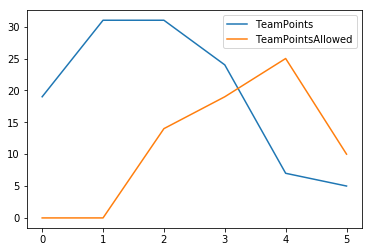

In [12]:
games_df[games_df['Tournament']=='Dubai'][['TeamPoints','TeamPointsAllowed']].plot()

Dubai


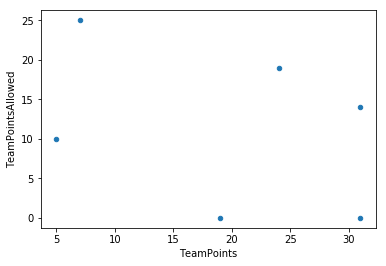

Sydney


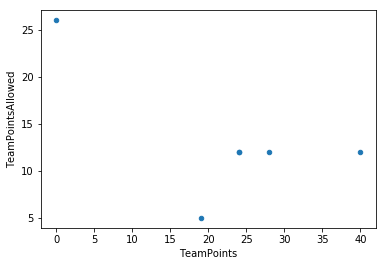

Commonwealth


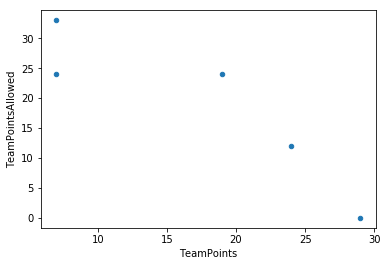

Kitakyushu


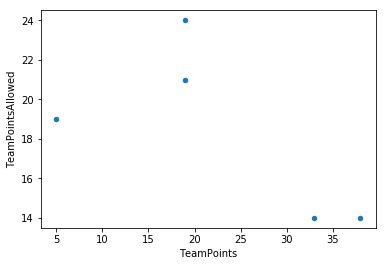

Langford


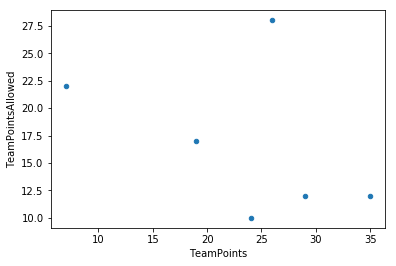

Paris


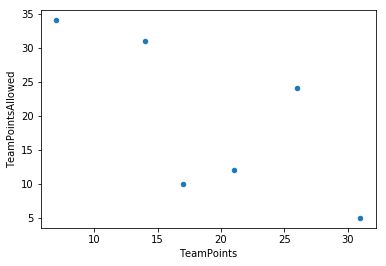

World Cup


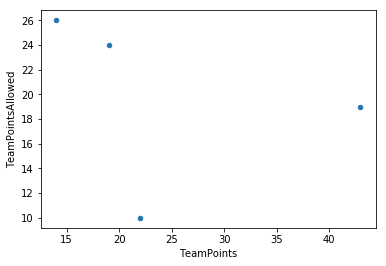

In [13]:
for i in games_df['Tournament'].unique():
    print(i)
    games_df[games_df['Tournament']==i][['TeamPoints','TeamPointsAllowed']].plot(kind='scatter',x='TeamPoints',y='TeamPointsAllowed')
    plt.show()

Spain


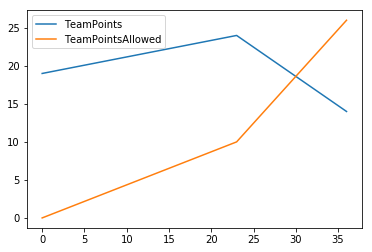

Ireland


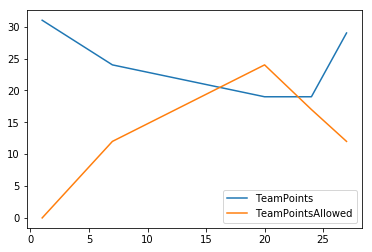

Fiji


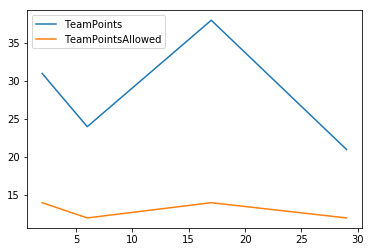

France


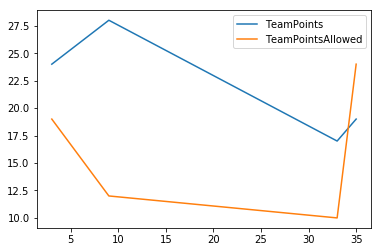

Australia


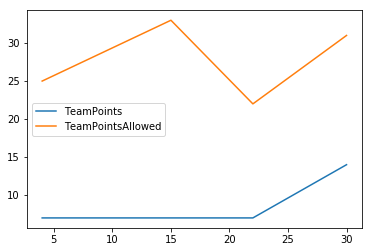

Russia


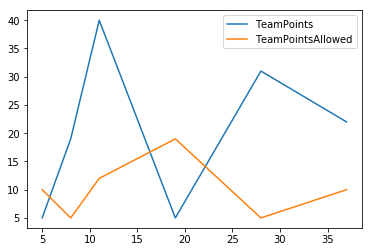

New Zealand


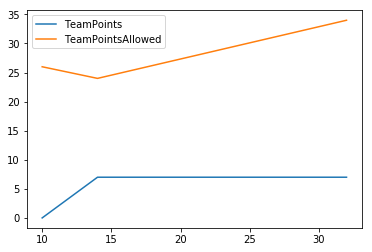

South Africa


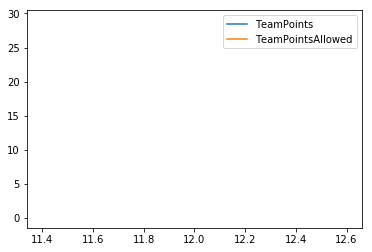

Kenya


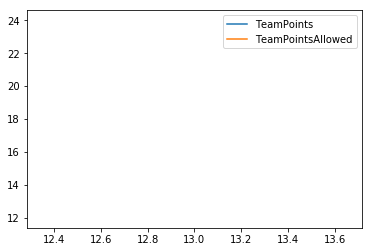

England


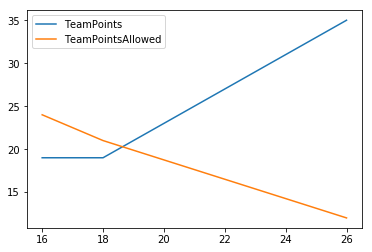

Japan


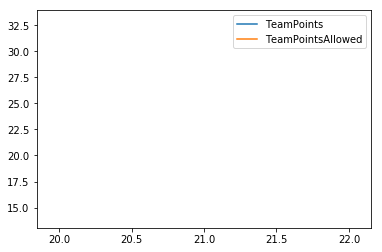

USA


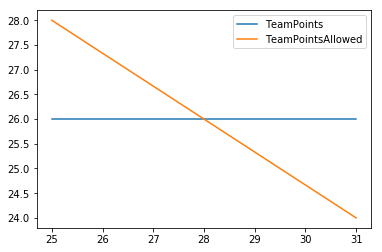

Brazil


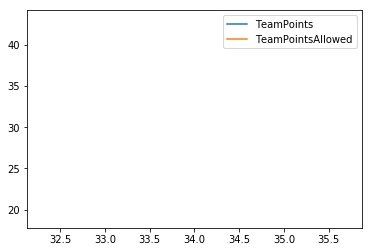

In [14]:
for i in games_df['Opponent'].unique():
    print(i)
    games_df[games_df['Opponent']==i][['TeamPoints','TeamPointsAllowed']].plot()
    plt.show()

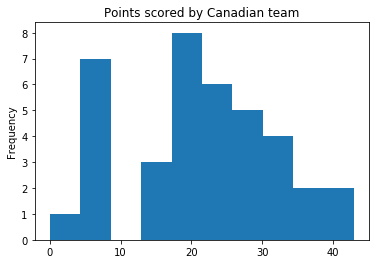

In [15]:
games_df['TeamPoints'].plot.hist()
plt.title("Points scored by Canadian team")
plt.show()

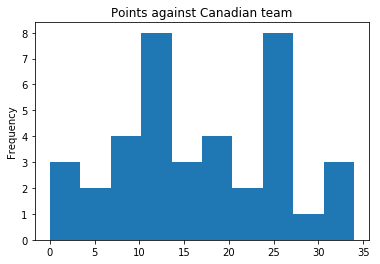

In [16]:
games_df['TeamPointsAllowed'].plot.hist()
plt.title("Points against Canadian team")
plt.show()

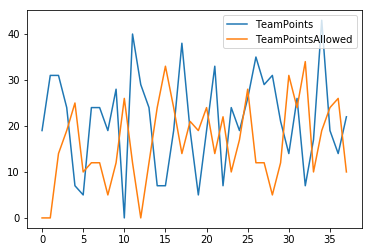

In [17]:
games_df[['TeamPoints','TeamPointsAllowed']].plot()

In [18]:
np.correlate(games_df['TeamPoints'].values,games_df['TeamPointsAllowed'].values)

array([11632])

In [19]:
games_df['TeamPoints'].corr(games_df['TeamPointsAllowed'])

-0.4837798819769522

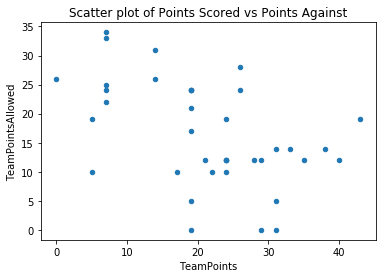

In [21]:
games_df[['TeamPoints','TeamPointsAllowed']].plot(kind='scatter',x='TeamPoints',y='TeamPointsAllowed')
plt.title("Scatter plot of Points Scored vs Points Against")
plt.show()

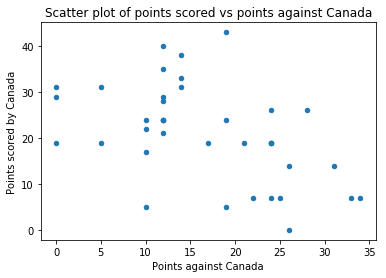

In [29]:
games_df[['TeamPointsAllowed','TeamPoints']].plot(kind='scatter',x='TeamPointsAllowed',y='TeamPoints')
plt.xlabel("Points against Canada")
plt.ylabel("Points scored by Canada")
plt.title("Scatter plot of points scored vs points against Canada")
plt.show()